In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 831s 14ms/step - loss: 0.2799 - acc: 0.9109 - val_loss: 0.0502 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 893s 15ms/step - loss: 0.0901 - acc: 0.9725 - val_loss: 0.0366 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 895s 15ms/step - loss: 0.0695 - acc: 0.9790 - val_loss: 0.0277 - val_acc: 0.9915
Epoch 4/12
60000/60000 [==============================] - 891s 15ms/step - loss: 0.0584 - acc: 0.9826 - val_loss: 0.0254 - val_acc: 0.9918
Epoch 5/12
60000/6000

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


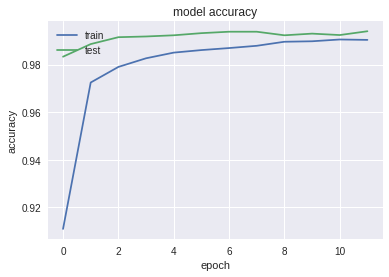

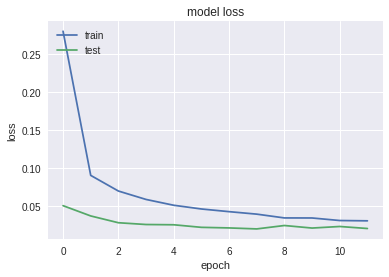

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion Table 

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Set", "Model", "Architectures", "Val_Acc", "Val_Loss"]

x.add_row(["Set:-1", "Convolutional Neural Nets", "MNIST_1", 0.0200, 0.9934])
x.add_row(["Set:-1", "Convolutional Neural Nets", "MNIST_2", 0.0215, 0.9929])
x.add_row(["Set:-1", "Convolutional Neural Nets", "MNIST_3", 0.0201, 0.9940])
print(x)

+--------+---------------------------+---------------+---------+----------+
|  Set   |           Model           | Architectures | Val_Acc | Val_Loss |
+--------+---------------------------+---------------+---------+----------+
| Set:-1 | Convolutional Neural Nets |    MNIST_1    |   0.02  |  0.9934  |
| Set:-1 | Convolutional Neural Nets |    MNIST_2    |  0.0215 |  0.9929  |
| Set:-1 | Convolutional Neural Nets |    MNIST_3    |  0.0201 |  0.994   |
+--------+---------------------------+---------------+---------+----------+


# Conclusion :-

1. First declared all batch size , epchos, ClasseNumbers and then loaded MNIST dataset.
2. Then sampled MNIST dataset and splited into train and test data.
3. Then converted Class vector into binary class matrics and applied CNN metthon in it and with model _3 used cnnvet= (7,7)
4. Then applied dropout rate= (0.35) and Maxpooling= (5,5) in it and changne their values with architechtures .
5. Then plot Moldel acc and Model loss in it '

<h2>=======================================================================</h2>